# Analyse No-Go Areas

### im Linux Kernel

## Datenimport

In [1]:
import pandas as pd

log = pd.read_csv("../dataset/linux_blame_log.csv")
log.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,1
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,2
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,3
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,1253753175000000000,4
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,5


In [2]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665947 entries, 0 to 5665946
Data columns (total 4 columns):
path         object
author       object
timestamp    int64
line         int64
dtypes: int64(2), object(2)
memory usage: 172.9+ MB


## Haupt-Committer

In [3]:
top10 = log.author.value_counts().head(10)
top10

Linus Torvalds           838200
Hans Verkuil             118432
Mauro Carvalho Chehab    102107
Michael Chan              53945
Mike Marciniszyn          44843
Ralph Campbell            42453
Nicholas Bellinger        41823
Laurent Pinchart          40438
Antti Palosaari           40390
Alexander Duyck           39307
Name: author, dtype: int64

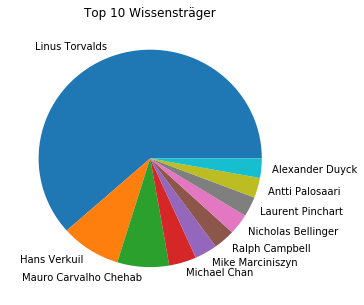

In [4]:
%matplotlib inline
top10.plot.pie(figsize=[5,5],
               title="Top 10 Wissensträger",
              label="");

## No-Go Areas

In [5]:
log.timestamp = pd.to_datetime(log.timestamp)
log.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5


In [6]:
log['age'] = pd.Timestamp('today') - log.timestamp
log.head()

,path,author,timestamp,line,age
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1,958 days 02:47:24.714220
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2,958 days 02:47:24.714220
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3,958 days 02:47:24.714220
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4,3212 days 10:55:54.714220
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5,958 days 02:47:24.714220


In [7]:
log['component'] = log.path.str.split("/").str[0:2].str.join(":")
log.head()

,path,author,timestamp,line,age,component
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1,958 days 02:47:24.714220,drivers:scsi
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2,958 days 02:47:24.714220,drivers:scsi
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3,958 days 02:47:24.714220,drivers:scsi
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4,3212 days 10:55:54.714220,drivers:scsi
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5,958 days 02:47:24.714220,drivers:scsi


In [8]:
age_per_component = \
    log.groupby(['component'])\
        .age.min().sort_values()
age_per_component.head()

component
drivers:scsi   90 days 18:16:00.714220
drivers:i2c    90 days 19:36:35.714220
drivers:net    90 days 19:51:51.714220
drivers:of     91 days 12:10:53.714220
drivers:pci    91 days 15:57:48.714220
Name: age, dtype: timedelta64[ns]

In [9]:
age_per_component.tail(10)

component
arch:ia64         2662 days 22:37:23.714220
arch:unicore32    2691 days 22:20:51.714220
drivers:char      2703 days 19:14:47.714220
drivers:serial    2728 days 04:22:16.714220
drivers:mfd       2751 days 13:19:37.714220
include:scsi      3792 days 12:28:33.714220
arch:i386         3930 days 04:17:37.714220
drivers:usb       4087 days 06:44:40.714220
include:asm-arm   4240 days 22:07:16.714220
arch:sparc64      4535 days 00:49:25.714220
Name: age, dtype: timedelta64[ns]

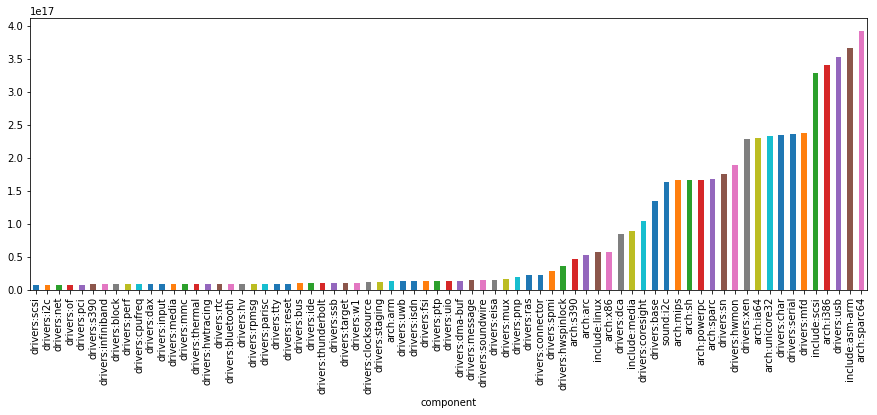

In [10]:
age_per_component.plot.bar(figsize=[15,5]);

## Bonus 1: Vorhandenes Wissen

In [11]:
knowledge = log.timestamp > pd.Timestamp('today') - pd.DateOffset(months=6)
knowledge.value_counts()

False    5537658
True      128289
Name: timestamp, dtype: int64

In [12]:
knowledge.mean()

0.022642110842194606

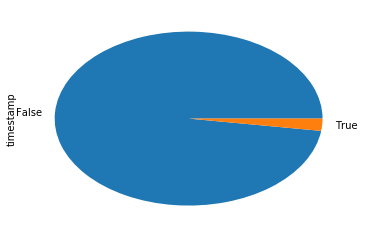

In [13]:
knowledge.value_counts().plot.pie();

## Bonus 2: Aufwand in Komponenten

In [14]:
log_timed = log.set_index('timestamp')
log_timed.head()

,path,author,line,age,component
timestamp,,,,,
2015-11-26 08:54:45,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1,958 days 02:47:24.714220,drivers:scsi
2015-11-26 08:54:45,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2,958 days 02:47:24.714220,drivers:scsi
2015-11-26 08:54:45,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,3,958 days 02:47:24.714220,drivers:scsi
2009-09-24 00:46:15,drivers/scsi/bfa/bfad_drv.h,Jing Huang,4,3212 days 10:55:54.714220,drivers:scsi
2015-11-26 08:54:45,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,5,958 days 02:47:24.714220,drivers:scsi


In [15]:
log_timed = log.groupby([pd.Grouper(key='timestamp', freq='M'), 'component']).line.count()
log_timed.head()

timestamp   component         
2002-04-30  drivers:block          8
            drivers:infiniband    17
2003-02-28  drivers:net           40
2005-03-31  drivers:block          9
            drivers:char           3
Name: line, dtype: int64

In [16]:
component_history = log_timed.unstack().fillna(0)
component_history.head()

component,arch:arc,arch:arm,arch:i386,arch:ia64,arch:mips,arch:powerpc,arch:s390,arch:sh,arch:sparc,arch:sparc64,...,drivers:uio,drivers:usb,drivers:uwb,drivers:w1,drivers:xen,include:asm-arm,include:linux,include:media,include:scsi,sound:i2c
timestamp,,,,,,,,,,,,,,,,,,,,,
2002-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-04-30,0.0,497.0,5045.0,0.0,0.0,0.0,0.0,53.0,0.0,494.0,...,0.0,4333.0,0.0,1571.0,0.0,46.0,200.0,0.0,0.0,88.0
2005-05-31,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,41.0,0.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
relative_history = component_history.apply(
    lambda x : x / component_history.sum(axis=1))
relative_history.head()

component,arch:arc,arch:arm,arch:i386,arch:ia64,arch:mips,arch:powerpc,arch:s390,arch:sh,arch:sparc,arch:sparc64,...,drivers:uio,drivers:usb,drivers:uwb,drivers:w1,drivers:xen,include:asm-arm,include:linux,include:media,include:scsi,sound:i2c
timestamp,,,,,,,,,,,,,,,,,,,,,
2002-04-30,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
2003-02-28,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
2005-03-31,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
2005-04-30,0.0,0.00059,0.005992,0.0,0.0,0.0,0.0,0.000063,0.0,0.000587,...,0.0,0.005147,0.0,0.001866,0.0,0.000055,0.000238,0.0,0.0,0.000105
2005-05-31,0.0,0.00000,0.000276,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.001885,0.0,0.003081,0.0,0.000000,0.000000,0.0,0.0,0.000000


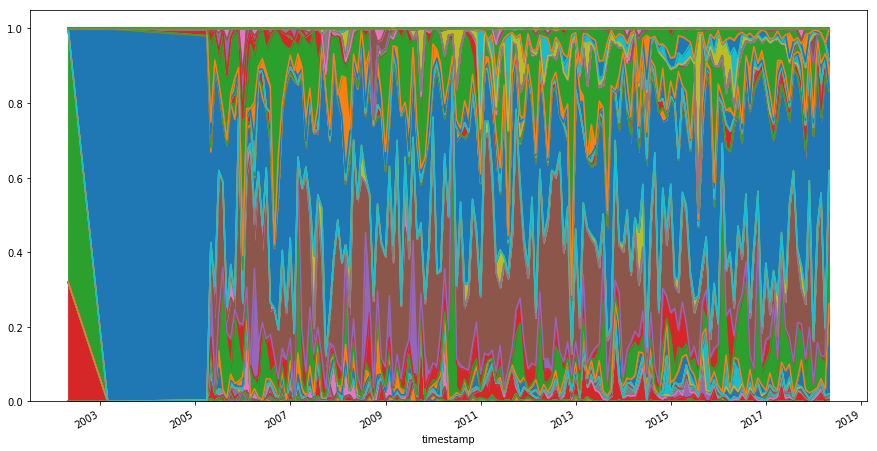

In [18]:
relative_history.plot.area(legend=False, figsize=[15,8])